# Capstone Project 2: Recommender System


## Exploratory Data Analysis
With a cleaned and prepared dataset exploratory data analysis (EDA) can be performed to see if there are any potential trends or relationships within the data. The EDA will provide the foundation for deeper analysis as well as assist in guiding the flow of the project.   

The dataset will first be loaded and observed using similar steps performed in the data cleaning/wrangling.

In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [49]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

C:\Users\Thompson\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [50]:
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


The first area of interest to explore is the rating column. This column is the rating that each reviewer gives the item. The dataset will be grouped up by itemID and the average ratings will be aggregated. A histrogram of the average rating for each item will be created to visualize the distribution of ratings that items tend to receive.

In [52]:
#performing pandas groupby method on 'asin' and 'overall' columns
df_mean_rating = df[['itemID','rating']].groupby('itemID').mean()

In [53]:

df_mean_rating.head()

,rating
itemID,
0528881469,2.400000
0594451647,4.200000
0594481813,4.000000
0972683275,4.461187
1400501466,3.953488


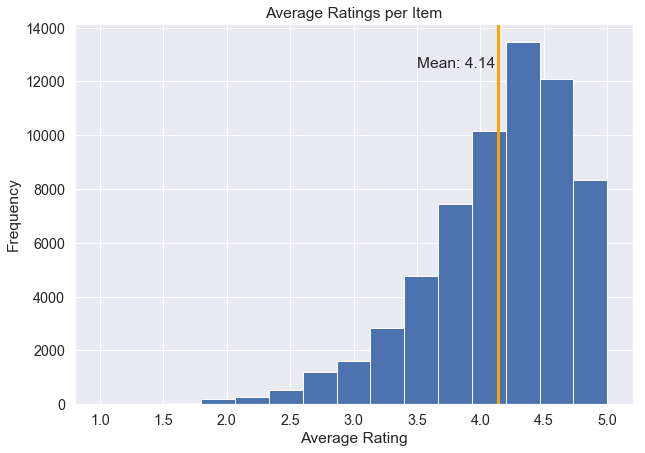

In [92]:
plt.title('Average Ratings per Item')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')
#the average score given to all items
avg_rating = np.mean(df_mean_rating['rating'])
plt.text(3.5,12500, 'Mean: %.2f' % avg_rating)

plt.hist(df_mean_rating['rating'], bins=15)
plt.axvline(avg_rating, color='orange', lw=3)
plt.show()

In [60]:
len(df_mean_rating), len(set(df.itemID))

(63001, 63001)

In [76]:
avg_rating

rating    4.13746
dtype: float64

In [16]:
len(set(df.asin)), len(df.asin)

(63001, 1689188)